## 1. Import Libraries

In [48]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load All Datasets

In [49]:
# Load all datasets
data_path = '../data/raw/'

print("Loading datasets...")
beneficiary_df = pd.read_csv(data_path + 'Train_Beneficiarydata-1542865627584.csv')
inpatient_df = pd.read_csv(data_path + 'Train_Inpatientdata-1542865627584.csv')
outpatient_df = pd.read_csv(data_path + 'Train_Outpatientdata-1542865627584.csv')
labels_df = pd.read_csv(data_path + 'Train-1542865627584.csv')

print("✓ Datasets loaded successfully!\n")
print(f"Beneficiary data: {beneficiary_df.shape}")
print(f"Inpatient data: {inpatient_df.shape}")
print(f"Outpatient data: {outpatient_df.shape}")
print(f"Labels data: {labels_df.shape}")

Loading datasets...
✓ Datasets loaded successfully!

Beneficiary data: (138556, 25)
Inpatient data: (40474, 30)
Outpatient data: (517737, 27)
Labels data: (5410, 2)
✓ Datasets loaded successfully!

Beneficiary data: (138556, 25)
Inpatient data: (40474, 30)
Outpatient data: (517737, 27)
Labels data: (5410, 2)


## 3. Data Quality Assessment - Inpatient Data

In [50]:
print("=" * 80)
print("INPATIENT CLAIMS - DATA QUALITY ASSESSMENT")
print("=" * 80)

print("\n📊 Shape:", inpatient_df.shape)
print("\n📋 Column Information:")
print(inpatient_df.info())

print("\n📈 Missing Values:")
missing = inpatient_df.isnull().sum()
missing_pct = (missing / len(inpatient_df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n🔍 Duplicates:", inpatient_df.duplicated().sum())
print("\n📝 First 5 rows:")
inpatient_df.head()

INPATIENT CLAIMS - DATA QUALITY ASSESSMENT

📊 Shape: (40474, 30)

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  Dia

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.00,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.00,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.00,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.00,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.00,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.00,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.00,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.00,NaN,NaN,NaN,NaN,NaN


## 4. Examine Dataset Relationships and Join Keys

In [51]:
print("=" * 80)
print("DATASET RELATIONSHIPS AND JOIN KEYS")
print("=" * 80)

print("\n🔗 KEY IDENTIFIERS:")
print(f"\n1. BeneID (Patient Identifier):")
print(f"   - Unique beneficiaries: {beneficiary_df['BeneID'].nunique():,}")
print(f"   - In inpatient claims: {inpatient_df['BeneID'].nunique():,}")
print(f"   - In outpatient claims: {outpatient_df['BeneID'].nunique():,}")

print(f"\n2. Provider (Healthcare Provider Identifier):")
print(f"   - Labeled providers: {labels_df['Provider'].nunique():,}")
print(f"   - Providers in inpatient: {inpatient_df['Provider'].nunique():,}")
print(f"   - Providers in outpatient: {outpatient_df['Provider'].nunique():,}")

print(f"\n3. ClaimID (Claim Identifier):")
print(f"   - Inpatient claims: {inpatient_df['ClaimID'].nunique():,}")
print(f"   - Outpatient claims: {outpatient_df['ClaimID'].nunique():,}")

print("\n📊 GRANULARITY LEVELS:")
print("   - Beneficiary level: 1 row per patient (demographics, conditions)")
print("   - Claim level: 1 row per claim (inpatient/outpatient)")
print("   - Provider level: 1 row per provider (target for modeling)")

print("\n🔄 JOIN STRATEGY:")
print("   - Beneficiary → Claims: BeneID")
print("   - Claims → Provider: Provider")
print("   - Provider → Labels: Provider")
print("   - Final aggregation: Claim-level → Provider-level")

DATASET RELATIONSHIPS AND JOIN KEYS

🔗 KEY IDENTIFIERS:

1. BeneID (Patient Identifier):
   - Unique beneficiaries: 138,556
   - In inpatient claims: 31,289
   - In outpatient claims: 133,980

2. Provider (Healthcare Provider Identifier):
   - Labeled providers: 5,410
   - Providers in inpatient: 2,092
   - Providers in outpatient: 5,012

3. ClaimID (Claim Identifier):
   - Inpatient claims: 40,474
   - Outpatient claims: 517,737

📊 GRANULARITY LEVELS:
   - Beneficiary level: 1 row per patient (demographics, conditions)
   - Claim level: 1 row per claim (inpatient/outpatient)
   - Provider level: 1 row per provider (target for modeling)

🔄 JOIN STRATEGY:
   - Beneficiary → Claims: BeneID
   - Claims → Provider: Provider
   - Provider → Labels: Provider
   - Final aggregation: Claim-level → Provider-level


## 5. Target Variable Analysis

TARGET VARIABLE ANALYSIS

📊 Fraud Distribution:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

📈 Percentage:
PotentialFraud
No    90.65
Yes    9.35
Name: proportion, dtype: float64

⚖️ Class Imbalance Ratio: 9.69:1 (Non-fraud:Fraud)


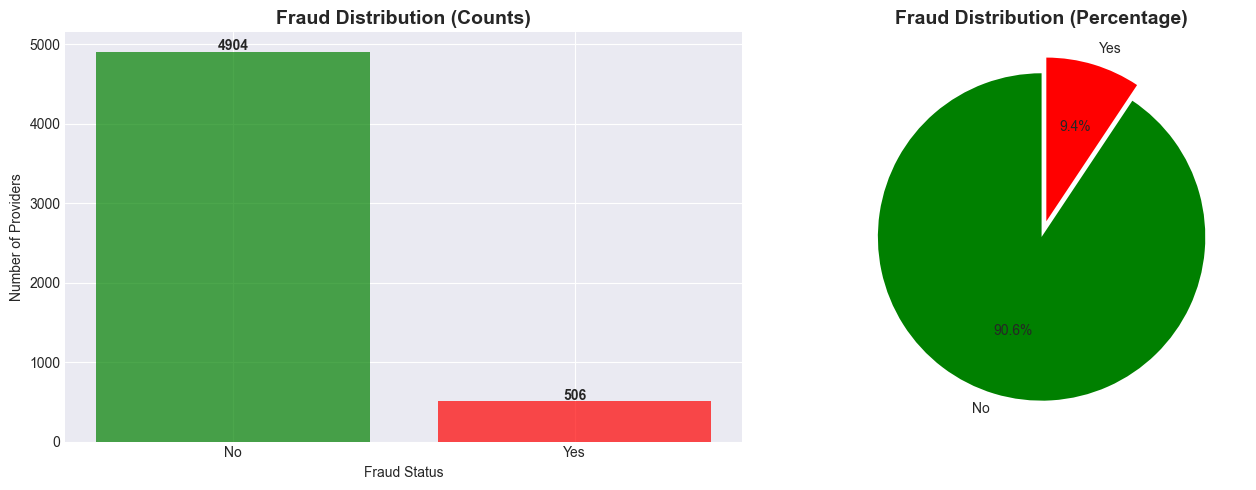

In [ ]:




print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

fraud_counts = labels_df['PotentialFraud'].value_counts()
fraud_pct = labels_df['PotentialFraud'].value_counts(normalize=True) * 100

print("\n📊 Fraud Distribution:")
print(fraud_counts)
print("\n📈 Percentage:")
print(fraud_pct)
print(f"\n⚖️ Class Imbalance Ratio: {fraud_counts['No'] / fraud_counts['Yes']:.2f}:1 (Non-fraud:Fraud)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(fraud_counts.index, fraud_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Fraud Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Number of Providers')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['green', 'red']
axes[1].pie(fraud_pct.values, labels=fraud_pct.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0, 0.1))
axes[1].set_title('Fraud Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
# Convert target to binary
labels_df['Fraud'] = (labels_df['PotentialFraud'] == 'Yes').astype(int)

## 6. Date Feature Engineering

In [6]:
# Convert dates for inpatient
date_cols_inpatient = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']
for col in date_cols_inpatient:
    if col in inpatient_df.columns:
        inpatient_df[col] = pd.to_datetime(inpatient_df[col], errors='coerce')

# Create temporal features
inpatient_df['ClaimDuration'] = (inpatient_df['ClaimEndDt'] - inpatient_df['ClaimStartDt']).dt.days
inpatient_df['AdmissionDuration'] = (inpatient_df['DischargeDt'] - inpatient_df['AdmissionDt']).dt.days
inpatient_df['ClaimMonth'] = inpatient_df['ClaimStartDt'].dt.month
inpatient_df['ClaimYear'] = inpatient_df['ClaimStartDt'].dt.year
inpatient_df['ClaimDayOfWeek'] = inpatient_df['ClaimStartDt'].dt.dayofweek

print("✓ Temporal features created")
print("\n📅 Date Range:")
print(f"Claim Start: {inpatient_df['ClaimStartDt'].min()} to {inpatient_df['ClaimStartDt'].max()}")
print(f"\n📊 Claim Duration Statistics:")
print(inpatient_df['ClaimDuration'].describe())
print(f"\n🏥 Admission Duration Statistics:")
print(inpatient_df['AdmissionDuration'].describe())

✓ Temporal features created

📅 Date Range:
Claim Start: 2008-11-27 00:00:00 to 2009-12-31 00:00:00

📊 Claim Duration Statistics:
count   40474.00
mean        5.66
std         5.63
min         0.00
25%         2.00
50%         4.00
75%         7.00
max        36.00
Name: ClaimDuration, dtype: float64

🏥 Admission Duration Statistics:
count   40474.00
mean        5.67
std         5.64
min         0.00
25%         2.00
50%         4.00
75%         7.00
max        35.00
Name: AdmissionDuration, dtype: float64


## 7. Provider-Level Aggregation - Inpatient Claims

In [22]:
print("Creating provider-level features from inpatient claims...")

# Aggregate inpatient data by provider
provider_inpatient = inpatient_df.groupby('Provider').agg({
    'ClaimID': 'count',  # Number of claims
    'BeneID': 'nunique',  # Unique patients
    'InscClaimAmtReimbursed': ['mean', 'sum', 'max', 'std', 'median'],
    'DeductibleAmtPaid': ['mean', 'sum'],
    'ClaimDuration': ['mean', 'sum', 'max', 'std'],
    'AdmissionDuration': ['mean', 'sum', 'max', 'std'],
    'AttendingPhysician': 'nunique',
    'OperatingPhysician': 'nunique',
    'OtherPhysician': 'nunique'
}).reset_index()

# Flatten column names
provider_inpatient.columns = ['Provider', 
    'IP_NumClaims', 'IP_NumBeneficiaries',
    'IP_AvgReimbursement', 'IP_TotalReimbursement', 'IP_MaxReimbursement', 'IP_StdReimbursement', 'IP_MedianReimbursement',
    'IP_AvgDeductible', 'IP_TotalDeductible',
    'IP_AvgClaimDuration', 'IP_TotalClaimDuration', 'IP_MaxClaimDuration', 'IP_StdClaimDuration',
    'IP_AvgAdmissionDuration', 'IP_TotalAdmissionDuration', 'IP_MaxAdmissionDuration', 'IP_StdAdmissionDuration',
    'IP_NumAttendingPhysicians', 'IP_NumOperatingPhysicians', 'IP_NumOtherPhysicians'
]

# Derived features
provider_inpatient['IP_ClaimsPerBeneficiary'] = provider_inpatient['IP_NumClaims'] / provider_inpatient['IP_NumBeneficiaries']
provider_inpatient['IP_ReimbursementPerDay'] = provider_inpatient['IP_TotalReimbursement'] / provider_inpatient['IP_TotalAdmissionDuration'].replace(0, np.nan)
provider_inpatient['IP_ReimbursementPerBeneficiary'] = provider_inpatient['IP_TotalReimbursement'] / provider_inpatient['IP_NumBeneficiaries']
provider_inpatient['IP_TotalPhysicians'] = provider_inpatient['IP_NumAttendingPhysicians'] + provider_inpatient['IP_NumOperatingPhysicians'] + provider_inpatient['IP_NumOtherPhysicians']

print(f"✓ Created provider-level inpatient features: {provider_inpatient.shape}")
provider_inpatient.head()

Creating provider-level features from inpatient claims...
✓ Created provider-level inpatient features: (2092, 25)


,Provider,IP_NumClaims,IP_NumBeneficiaries,IP_AvgReimbursement,IP_TotalReimbursement,IP_MaxReimbursement,IP_StdReimbursement,IP_MedianReimbursement,IP_AvgDeductible,IP_TotalDeductible,IP_AvgClaimDuration,IP_TotalClaimDuration,IP_MaxClaimDuration,IP_StdClaimDuration,IP_AvgAdmissionDuration,IP_TotalAdmissionDuration,IP_MaxAdmissionDuration,IP_StdAdmissionDuration,IP_NumAttendingPhysicians,IP_NumOperatingPhysicians,IP_NumOtherPhysicians,IP_ClaimsPerBeneficiary,IP_ReimbursementPerDay,IP_ReimbursementPerBeneficiary,IP_TotalPhysicians
0,PRV51001,5,5,19400.00,97000,42000,18352.11,12000.00,1068.00,5340.00,5.00,25,14,5.39,5.00,25,14,5.39,4,2,1,1.00,3880.00,19400.00,7
1,PRV51003,62,53,9241.94,573000,57000,8513.61,7000.00,1068.00,66216.00,5.16,320,27,4.45,5.16,320,27,4.45,2,2,0,1.17,1790.62,10811.32,4
2,PRV51007,3,3,6333.33,19000,10000,3511.88,6000.00,1068.00,3204.00,5.33,16,7,1.53,5.33,16,7,1.53,2,1,0,1.00,1187.50,6333.33,3
3,PRV51008,2,2,12500.00,25000,21000,12020.82,12500.00,1068.00,2136.00,4.00,8,5,1.41,4.00,8,5,1.41,2,2,0,1.00,3125.00,12500.00,4
4,PRV51011,1,1,5000.00,5000,5000,NaN,5000.00,1068.00,1068.00,5.00,5,5,NaN,5.00,5,5,NaN,1,0,0,1.00,1000.00,5000.00,1


## 8. Diagnosis and Procedure Code Features

In [23]:
# Count unique diagnosis codes per provider
diag_cols = [col for col in inpatient_df.columns if 'ClmDiagnosisCode' in col]
proc_cols = [col for col in inpatient_df.columns if 'ClmProcedureCode' in col]

# Count non-null unique codes per provider
diagnosis_features = inpatient_df.groupby('Provider')[diag_cols].apply(
    lambda x: x.apply(lambda col: col.dropna().nunique())
).reset_index()

diagnosis_features['IP_TotalUniqueDiagnoses'] = diagnosis_features[diag_cols].sum(axis=1)
diagnosis_features = diagnosis_features[['Provider', 'IP_TotalUniqueDiagnoses']]

procedure_features = inpatient_df.groupby('Provider')[proc_cols].apply(
    lambda x: x.apply(lambda col: col.dropna().nunique())
).reset_index()

procedure_features['IP_TotalUniqueProcedures'] = procedure_features[proc_cols].sum(axis=1)
procedure_features = procedure_features[['Provider', 'IP_TotalUniqueProcedures']]

# Merge with provider features
provider_inpatient = provider_inpatient.merge(diagnosis_features, on='Provider', how='left')
provider_inpatient = provider_inpatient.merge(procedure_features, on='Provider', how='left')

print(f"✓ Added diagnosis and procedure features")
print(f"Columns: {list(provider_inpatient.columns[-2:])}")

✓ Added diagnosis and procedure features
Columns: ['IP_TotalUniqueDiagnoses', 'IP_TotalUniqueProcedures']


## 9. Merge with Labels and Compare Fraud vs Non-Fraud

In [29]:
# Merge provider features with labels
provider_features = provider_inpatient.merge(labels_df, on='Provider', how='left')

print(f"Final provider dataset shape: {provider_features.shape}")
print(f"\n📊 Fraud Distribution in final dataset:")
print(provider_features['PotentialFraud'].value_counts())

# Compare fraud vs non-fraud providers
print("\n" + "=" * 80)
print("FRAUD vs NON-FRAUD COMPARISON - INPATIENT FEATURES")
print("=" * 80)

comparison_cols = ['IP_NumClaims', 'IP_NumBeneficiaries', 'IP_AvgReimbursement', 
                   'IP_TotalReimbursement', 'IP_ClaimsPerBeneficiary',
                   'IP_AvgAdmissionDuration', 'IP_TotalUniqueDiagnoses']

comparison = provider_features.groupby('PotentialFraud')[comparison_cols].mean()
print("\nMean values by fraud status:")
print(comparison.T)

# Calculate percentage difference
pct_diff = ((comparison.loc['Yes'] - comparison.loc['No']) / comparison.loc['No'] * 100)
print("\n📈 Percentage Difference (Fraud vs Non-Fraud):")
print(pct_diff.sort_values(ascending=False))

Final provider dataset shape: (2092, 29)

📊 Fraud Distribution in final dataset:
PotentialFraud
No     1652
Yes     440
Name: count, dtype: int64

FRAUD vs NON-FRAUD COMPARISON - INPATIENT FEATURES

Mean values by fraud status:
PotentialFraud                 No       Yes
IP_NumClaims                10.33     53.19
IP_NumBeneficiaries          9.68     46.87
IP_AvgReimbursement       9984.86  11046.24
IP_TotalReimbursement   101094.74 548382.98
IP_ClaimsPerBeneficiary      1.05      1.13
IP_AvgAdmissionDuration      5.55      6.11
IP_TotalUniqueDiagnoses     77.34    339.27

📈 Percentage Difference (Fraud vs Non-Fraud):
IP_TotalReimbursement     442.44
IP_NumClaims              414.67
IP_NumBeneficiaries       384.15
IP_TotalUniqueDiagnoses   338.68
IP_AvgReimbursement        10.63
IP_AvgAdmissionDuration    10.23
IP_ClaimsPerBeneficiary     7.52
dtype: float64


## 10. Visualization - Fraud vs Non-Fraud Patterns

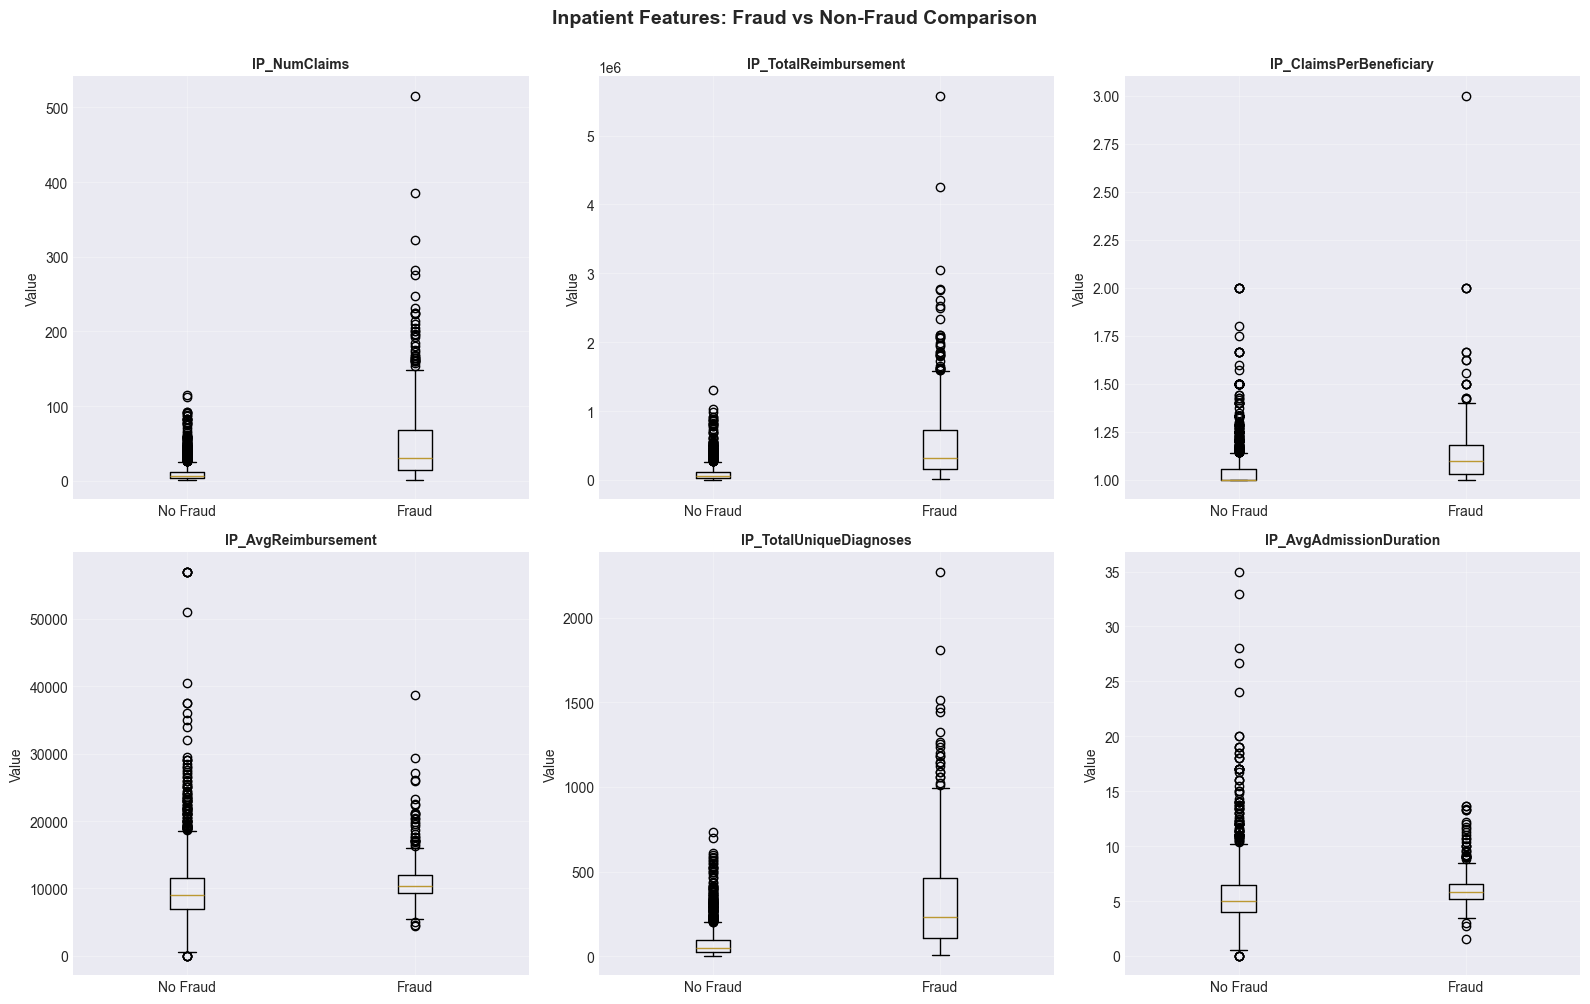

In [10]:
# Box plots comparing fraud vs non-fraud
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

features_to_plot = ['IP_NumClaims', 'IP_TotalReimbursement', 'IP_ClaimsPerBeneficiary',
                   'IP_AvgReimbursement', 'IP_TotalUniqueDiagnoses', 'IP_AvgAdmissionDuration']

for idx, feature in enumerate(features_to_plot):
    fraud_data = provider_features[provider_features['PotentialFraud'] == 'Yes'][feature].dropna()
    no_fraud_data = provider_features[provider_features['PotentialFraud'] == 'No'][feature].dropna()
    
    axes[idx].boxplot([no_fraud_data, fraud_data], labels=['No Fraud', 'Fraud'])
    axes[idx].set_title(f'{feature}', fontweight='bold', fontsize=10)
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Inpatient Features: Fraud vs Non-Fraud Comparison', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 11. Correlation Analysis

Top 15 Features Correlated with Fraud:
IP_MaxClaimDuration         0.55
IP_MaxAdmissionDuration     0.55
IP_TotalUniqueProcedures    0.54
IP_TotalUniqueDiagnoses     0.53
IP_TotalReimbursement       0.51
IP_TotalClaimDuration       0.50
IP_TotalAdmissionDuration   0.50
IP_TotalDeductible          0.50
IP_NumClaims                0.50
IP_NumBeneficiaries         0.49
IP_MaxReimbursement         0.46
IP_StdClaimDuration         0.28
IP_StdAdmissionDuration     0.27
IP_NumOperatingPhysicians   0.25
IP_ClaimsPerBeneficiary     0.24
Name: Fraud, dtype: float64


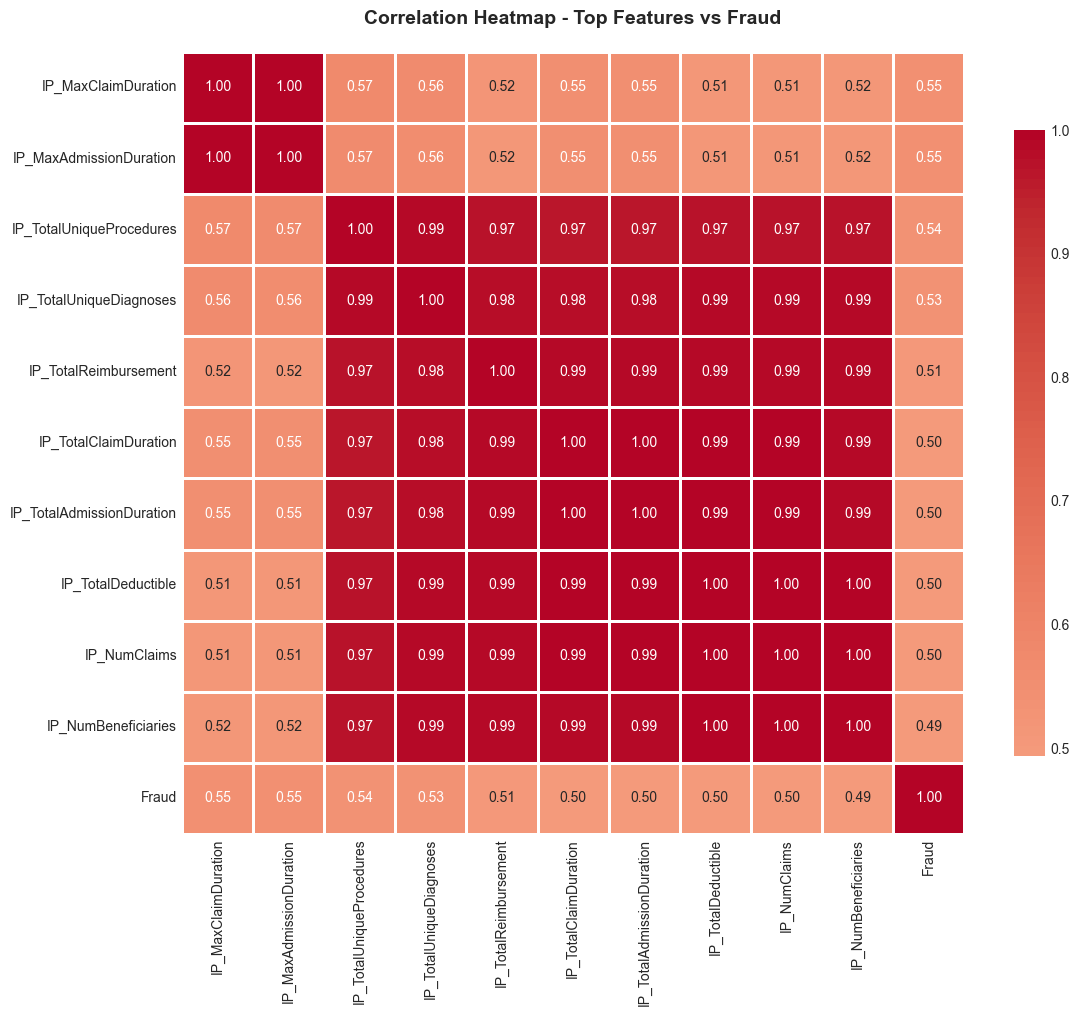

In [11]:
# Calculate correlations with fraud
numeric_cols = provider_features.select_dtypes(include=[np.number]).columns.tolist()
if 'Fraud' in numeric_cols:
    numeric_cols.remove('Fraud')

correlations = provider_features[numeric_cols + ['Fraud']].corr()['Fraud'].sort_values(ascending=False)

print("Top 15 Features Correlated with Fraud:")
print(correlations[1:16])

# Correlation heatmap
top_features = correlations[1:11].index.tolist() + ['Fraud']
correlation_matrix = provider_features[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top Features vs Fraud', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 12. Temporal Patterns Analysis

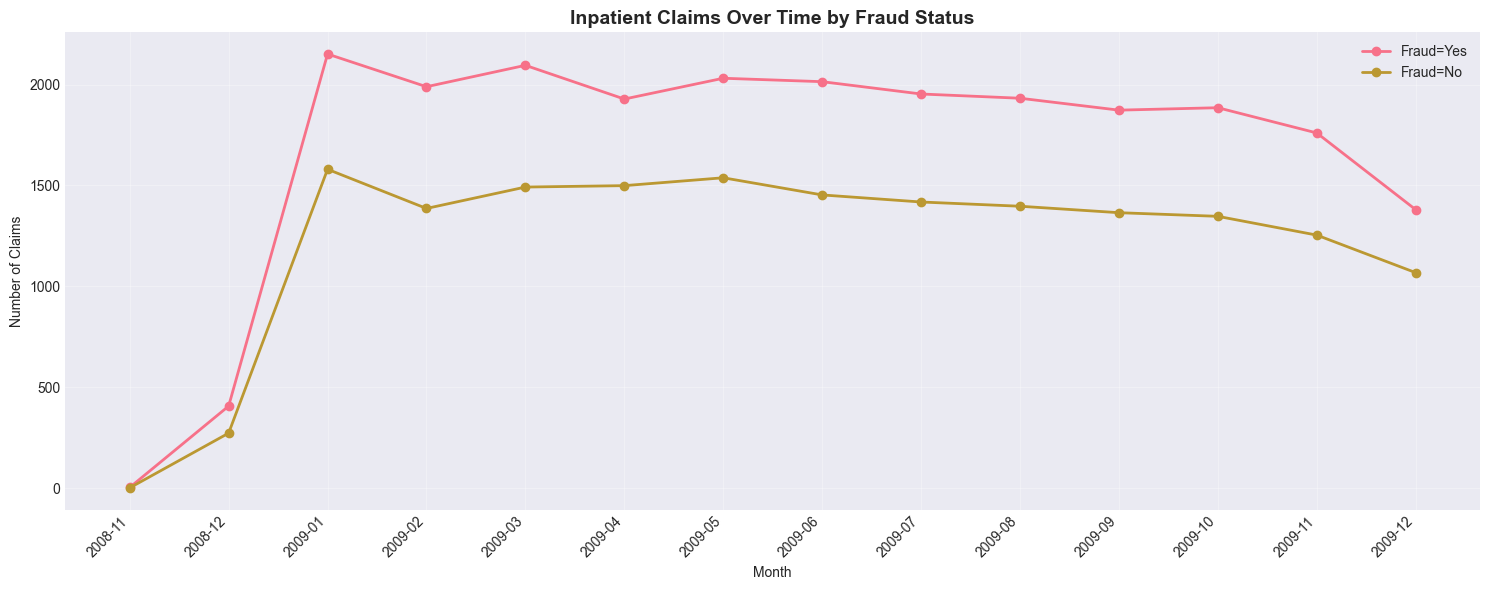

In [12]:
# Claims over time by fraud status
inpatient_with_labels = inpatient_df.merge(labels_df[['Provider', 'PotentialFraud']], on='Provider', how='left')
inpatient_with_labels['YearMonth'] = inpatient_with_labels['ClaimStartDt'].dt.to_period('M')

temporal_summary = inpatient_with_labels.groupby(['YearMonth', 'PotentialFraud']).size().reset_index(name='NumClaims')
temporal_summary['YearMonth'] = temporal_summary['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(15, 6))
for fraud_status in ['Yes', 'No']:
    data = temporal_summary[temporal_summary['PotentialFraud'] == fraud_status]
    plt.plot(data['YearMonth'], data['NumClaims'], marker='o', label=f'Fraud={fraud_status}', linewidth=2)

plt.title('Inpatient Claims Over Time by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Save Final Provider-Level Dataset

In [32]:
# Save the provider-level features safely (handles locked file on Windows)
import os, datetime

def safe_to_csv(df, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    try:
        df.to_csv(path, index=False)
        return path, False
    except PermissionError:
        base, ext = os.path.splitext(path)
        ts = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        alt = f"{base}_{ts}{ext}"
        df.to_csv(alt, index=False)
        return alt, True

output_path = '../data/processed/provider_inpatient_features.csv'
saved_path, used_fallback = safe_to_csv(provider_features, output_path)

print(f"✓ Saved provider features to: {saved_path}")
if used_fallback:
    print("ℹ️ Original file was locked or in use; saved with a timestamped filename instead.")

print(f"\nFinal Dataset Summary:")
print(f"  Shape: {provider_features.shape}")
print(f"  Number of providers: {provider_features['Provider'].nunique()}")
# Exclude non-feature columns: Provider, PotentialFraud, Fraud (if present)
non_feature_cols = [c for c in ['Provider', 'PotentialFraud', 'Fraud'] if c in provider_features.columns]
print(f"  Number of features: {provider_features.shape[1] - len(non_feature_cols)}")
print(f"  Fraud providers: {(provider_features['PotentialFraud'] == 'Yes').sum()}")
print(f"  Non-fraud providers: {(provider_features['PotentialFraud'] == 'No').sum()}")
print(f"\n📋 Feature columns:")
print(list(provider_features.columns))

✓ Saved provider features to: ../data/processed/provider_inpatient_features.csv

Final Dataset Summary:
  Shape: (2092, 29)
  Number of providers: 2092
  Number of features: 26
  Fraud providers: 440
  Non-fraud providers: 1652

📋 Feature columns:
['Provider', 'IP_NumClaims', 'IP_NumBeneficiaries', 'IP_AvgReimbursement', 'IP_TotalReimbursement', 'IP_MaxReimbursement', 'IP_StdReimbursement', 'IP_MedianReimbursement', 'IP_AvgDeductible', 'IP_TotalDeductible', 'IP_AvgClaimDuration', 'IP_TotalClaimDuration', 'IP_MaxClaimDuration', 'IP_StdClaimDuration', 'IP_AvgAdmissionDuration', 'IP_TotalAdmissionDuration', 'IP_MaxAdmissionDuration', 'IP_StdAdmissionDuration', 'IP_NumAttendingPhysicians', 'IP_NumOperatingPhysicians', 'IP_NumOtherPhysicians', 'IP_ClaimsPerBeneficiary', 'IP_ReimbursementPerDay', 'IP_ReimbursementPerBeneficiary', 'IP_TotalPhysicians', 'IP_TotalUniqueDiagnoses', 'IP_TotalUniqueProcedures', 'PotentialFraud', 'Fraud']


In [38]:
# Merge outpatient provider features with labels and save safely
import os, datetime

# Rebuild provider_outpatient if this cell ran before the OP aggregation
if 'provider_outpatient' not in globals():
    print('ℹ️ provider_outpatient not found. Rebuilding from outpatient_df...')
    # Ensure outpatient_df has dates and temporal features
    if 'ClaimStartDt' in outpatient_df.columns and 'ClaimEndDt' in outpatient_df.columns:
        if not np.issubdtype(outpatient_df['ClaimStartDt'].dtype, np.datetime64):
            outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'], errors='coerce')
        if not np.issubdtype(outpatient_df['ClaimEndDt'].dtype, np.datetime64):
            outpatient_df['ClaimEndDt'] = pd.to_datetime(outpatient_df['ClaimEndDt'], errors='coerce')
        outpatient_df['ClaimDuration'] = (outpatient_df['ClaimEndDt'] - outpatient_df['ClaimStartDt']).dt.days
    
    # Build aggregation config dynamically based on available columns
    agg_dict = {}
    if 'ClaimID' in outpatient_df.columns:
        agg_dict['ClaimID'] = 'count'
    if 'BeneID' in outpatient_df.columns:
        agg_dict['BeneID'] = 'nunique'
    if 'InscClaimAmtReimbursed' in outpatient_df.columns:
        agg_dict['InscClaimAmtReimbursed'] = ['mean', 'sum', 'max', 'std', 'median']
    if 'DeductibleAmtPaid' in outpatient_df.columns:
        agg_dict['DeductibleAmtPaid'] = ['mean', 'sum']
    if 'ClaimDuration' in outpatient_df.columns:
        agg_dict['ClaimDuration'] = ['mean', 'sum', 'max', 'std']
    for phys in ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']:
        if phys in outpatient_df.columns:
            agg_dict[phys] = 'nunique'

    provider_outpatient = outpatient_df.groupby('Provider').agg(agg_dict).reset_index()

    # Flatten multiindex columns to friendly OP_ names
    new_cols = ['Provider']
    for col in provider_outpatient.columns[1:]:
        if isinstance(col, tuple):
            base, func = col
        else:
            base, func = col, ''
        name = None
        if base == 'ClaimID' and func == 'count':
            name = 'OP_NumClaims'
        elif base == 'BeneID' and func == 'nunique':
            name = 'OP_NumBeneficiaries'
        elif base == 'InscClaimAmtReimbursed':
            mapping = {'mean': 'OP_AvgReimbursement', 'sum': 'OP_TotalReimbursement',
                       'max': 'OP_MaxReimbursement', 'std': 'OP_StdReimbursement', 'median': 'OP_MedianReimbursement'}
            name = mapping.get(func, f'OP_Reimbursement_{func}')
        elif base == 'DeductibleAmtPaid':
            mapping = {'mean': 'OP_AvgDeductible', 'sum': 'OP_TotalDeductible'}
            name = mapping.get(func, f'OP_Deductible_{func}')
        elif base == 'ClaimDuration':
            mapping = {'mean': 'OP_AvgClaimDuration', 'sum': 'OP_TotalClaimDuration',
                       'max': 'OP_MaxClaimDuration', 'std': 'OP_StdClaimDuration'}
            name = mapping.get(func, f'OP_ClaimDuration_{func}')
        elif base in ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'] and func == 'nunique':
            mapping = {
                'AttendingPhysician': 'OP_NumAttendingPhysicians',
                'OperatingPhysician': 'OP_NumOperatingPhysicians',
                'OtherPhysician': 'OP_NumOtherPhysicians'
            }
            name = mapping.get(base, f'OP_{base}_nunique')
        else:
            name = f'OP_{base}_{func}' if func else f'OP_{base}'
        new_cols.append(name)
    provider_outpatient.columns = new_cols

    # Derived features
    if 'OP_NumClaims' in provider_outpatient.columns and 'OP_NumBeneficiaries' in provider_outpatient.columns:
        provider_outpatient['OP_ClaimsPerBeneficiary'] = provider_outpatient['OP_NumClaims'] / provider_outpatient['OP_NumBeneficiaries'].replace(0, np.nan)
    if 'OP_TotalReimbursement' in provider_outpatient.columns and 'OP_TotalClaimDuration' in provider_outpatient.columns:
        provider_outpatient['OP_ReimbursementPerDay'] = provider_outpatient['OP_TotalReimbursement'] / provider_outpatient['OP_TotalClaimDuration'].replace(0, np.nan)
    if 'OP_TotalReimbursement' in provider_outpatient.columns and 'OP_NumBeneficiaries' in provider_outpatient.columns:
        provider_outpatient['OP_ReimbursementPerBeneficiary'] = provider_outpatient['OP_TotalReimbursement'] / provider_outpatient['OP_NumBeneficiaries'].replace(0, np.nan)


def safe_to_csv(df, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    try:
        df.to_csv(path, index=False)
        return path, False
    except PermissionError:
        base, ext = os.path.splitext(path)
        ts = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        alt = f"{base}_{ts}{ext}"
        df.to_csv(alt, index=False)
        return alt, True

provider_features_outpatient = provider_outpatient.merge(labels_df, on='Provider', how='left')

print(f"Final outpatient provider dataset shape: {provider_features_outpatient.shape}")
print("\n📊 OP Fraud Distribution:")
print(provider_features_outpatient['PotentialFraud'].value_counts())

op_output_path = '../data/processed/provider_outpatient_features.csv'
op_saved_path, op_used_fallback = safe_to_csv(provider_features_outpatient, op_output_path)

print(f"✓ Saved outpatient provider features to: {op_saved_path}")
if op_used_fallback:
    print('ℹ️ OP file was locked or in use; saved with a timestamped filename instead.')

print("\nOP Dataset Summary:")
print(f"  Providers: {provider_features_outpatient['Provider'].nunique()}")
print(f"  Columns: {provider_features_outpatient.shape[1]}")
print('  Sample columns:')
print(list(provider_features_outpatient.columns)[:20])

Final outpatient provider dataset shape: (5012, 24)

📊 OP Fraud Distribution:
PotentialFraud
No     4550
Yes     462
Name: count, dtype: int64
✓ Saved outpatient provider features to: ../data/processed/provider_outpatient_features_20251125_012443.csv
ℹ️ OP file was locked or in use; saved with a timestamped filename instead.

OP Dataset Summary:
  Providers: 5012
  Columns: 24
  Sample columns:
['Provider', 'OP_NumClaims', 'OP_NumBeneficiaries', 'OP_AvgReimbursement', 'OP_TotalReimbursement', 'OP_MaxReimbursement', 'OP_StdReimbursement', 'OP_MedianReimbursement', 'OP_AvgDeductible', 'OP_TotalDeductible', 'OP_AvgClaimDuration', 'OP_TotalClaimDuration', 'OP_MaxClaimDuration', 'OP_StdClaimDuration', 'OP_NumAttendingPhysicians', 'OP_NumOperatingPhysicians', 'OP_NumOtherPhysicians', 'OP_ClaimsPerBeneficiary', 'OP_ReimbursementPerDay', 'OP_ReimbursementPerBeneficiary']


## 18. Merge with Labels and Save Outpatient Dataset

In [37]:
# Count unique diagnosis and procedure codes per outpatient provider
diag_cols_op = [col for col in outpatient_df.columns if 'ClmDiagnosisCode' in col]
proc_cols_op = [col for col in outpatient_df.columns if 'ClmProcedureCode' in col]

# Diagnosis features
if len(diag_cols_op) > 0:
    op_diag_features = outpatient_df.groupby('Provider')[diag_cols_op].apply(
        lambda x: x.apply(lambda col: col.dropna().nunique())
    ).reset_index()
    op_diag_features['OP_TotalUniqueDiagnoses'] = op_diag_features[diag_cols_op].sum(axis=1)
    op_diag_features = op_diag_features[['Provider', 'OP_TotalUniqueDiagnoses']]
else:
    op_diag_features = pd.DataFrame({'Provider': outpatient_df['Provider'].unique(), 'OP_TotalUniqueDiagnoses': 0})

# Procedure features
if len(proc_cols_op) > 0:
    op_proc_features = outpatient_df.groupby('Provider')[proc_cols_op].apply(
        lambda x: x.apply(lambda col: col.dropna().nunique())
    ).reset_index()
    op_proc_features['OP_TotalUniqueProcedures'] = op_proc_features[proc_cols_op].sum(axis=1)
    op_proc_features = op_proc_features[['Provider', 'OP_TotalUniqueProcedures']]
else:
    op_proc_features = pd.DataFrame({'Provider': outpatient_df['Provider'].unique(), 'OP_TotalUniqueProcedures': 0})

# Merge with provider_outpatient
provider_outpatient = provider_outpatient.merge(op_diag_features, on='Provider', how='left')
provider_outpatient = provider_outpatient.merge(op_proc_features, on='Provider', how='left')

print("✓ Added outpatient diagnosis and procedure features")
print(provider_outpatient[['Provider', 'OP_TotalUniqueDiagnoses', 'OP_TotalUniqueProcedures']].head())

✓ Added outpatient diagnosis and procedure features
   Provider  OP_TotalUniqueDiagnoses  OP_TotalUniqueProcedures
0  PRV51001                       43                         0
1  PRV51003                      163                         0
2  PRV51004                      332                         0
3  PRV51005                     1873                         0
4  PRV51007                      180                         0


## 17. Outpatient Diagnosis and Procedure Code Features

In [36]:
print("Creating provider-level features from outpatient claims...")

# Build aggregation config dynamically based on available columns
agg_dict = {}
if 'ClaimID' in outpatient_df.columns:
    agg_dict['ClaimID'] = 'count'
if 'BeneID' in outpatient_df.columns:
    agg_dict['BeneID'] = 'nunique'
if 'InscClaimAmtReimbursed' in outpatient_df.columns:
    agg_dict['InscClaimAmtReimbursed'] = ['mean', 'sum', 'max', 'std', 'median']
if 'DeductibleAmtPaid' in outpatient_df.columns:
    agg_dict['DeductibleAmtPaid'] = ['mean', 'sum']
if 'ClaimDuration' in outpatient_df.columns:
    agg_dict['ClaimDuration'] = ['mean', 'sum', 'max', 'std']
for phys in ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']:
    if phys in outpatient_df.columns:
        agg_dict[phys] = 'nunique'

provider_outpatient = outpatient_df.groupby('Provider').agg(agg_dict).reset_index()

# Flatten multiindex columns to friendly OP_ names
new_cols = ['Provider']
for col in provider_outpatient.columns[1:]:
    if isinstance(col, tuple):
        base, func = col
    else:
        base, func = col, ''

    name = None
    if base == 'ClaimID' and func == 'count':
        name = 'OP_NumClaims'
    elif base == 'BeneID' and func == 'nunique':
        name = 'OP_NumBeneficiaries'
    elif base == 'InscClaimAmtReimbursed':
        mapping = {'mean': 'OP_AvgReimbursement', 'sum': 'OP_TotalReimbursement',
                   'max': 'OP_MaxReimbursement', 'std': 'OP_StdReimbursement', 'median': 'OP_MedianReimbursement'}
        name = mapping.get(func, f'OP_Reimbursement_{func}')
    elif base == 'DeductibleAmtPaid':
        mapping = {'mean': 'OP_AvgDeductible', 'sum': 'OP_TotalDeductible'}
        name = mapping.get(func, f'OP_Deductible_{func}')
    elif base == 'ClaimDuration':
        mapping = {'mean': 'OP_AvgClaimDuration', 'sum': 'OP_TotalClaimDuration',
                   'max': 'OP_MaxClaimDuration', 'std': 'OP_StdClaimDuration'}
        name = mapping.get(func, f'OP_ClaimDuration_{func}')
    elif base in ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'] and func == 'nunique':
        mapping = {
            'AttendingPhysician': 'OP_NumAttendingPhysicians',
            'OperatingPhysician': 'OP_NumOperatingPhysicians',
            'OtherPhysician': 'OP_NumOtherPhysicians'
        }
        name = mapping.get(base, f'OP_{base}_nunique')
    else:
        name = f'OP_{base}_{func}' if func else f'OP_{base}'

    new_cols.append(name)

provider_outpatient.columns = new_cols

# Derived features
if 'OP_NumClaims' in provider_outpatient.columns and 'OP_NumBeneficiaries' in provider_outpatient.columns:
    provider_outpatient['OP_ClaimsPerBeneficiary'] = provider_outpatient['OP_NumClaims'] / provider_outpatient['OP_NumBeneficiaries'].replace(0, np.nan)
if 'OP_TotalReimbursement' in provider_outpatient.columns and 'OP_TotalClaimDuration' in provider_outpatient.columns:
    provider_outpatient['OP_ReimbursementPerDay'] = provider_outpatient['OP_TotalReimbursement'] / provider_outpatient['OP_TotalClaimDuration'].replace(0, np.nan)
if 'OP_TotalReimbursement' in provider_outpatient.columns and 'OP_NumBeneficiaries' in provider_outpatient.columns:
    provider_outpatient['OP_ReimbursementPerBeneficiary'] = provider_outpatient['OP_TotalReimbursement'] / provider_outpatient['OP_NumBeneficiaries'].replace(0, np.nan)

print(f"✓ Created provider-level outpatient features: {provider_outpatient.shape}")
provider_outpatient.head()

Creating provider-level features from outpatient claims...
✓ Created provider-level outpatient features: (5012, 20)


,Provider,OP_NumClaims,OP_NumBeneficiaries,OP_AvgReimbursement,OP_TotalReimbursement,OP_MaxReimbursement,OP_StdReimbursement,OP_MedianReimbursement,OP_AvgDeductible,OP_TotalDeductible,OP_AvgClaimDuration,OP_TotalClaimDuration,OP_MaxClaimDuration,OP_StdClaimDuration,OP_NumAttendingPhysicians,OP_NumOperatingPhysicians,OP_NumOtherPhysicians,OP_ClaimsPerBeneficiary,OP_ReimbursementPerDay,OP_ReimbursementPerBeneficiary
0,PRV51001,20,19,382.00,7640,1500,422.82,150.00,0.00,0,0.55,11,9,2.01,10,3,7,1.05,694.55,402.11
1,PRV51003,70,66,466.71,32670,3300,821.36,90.00,1.00,70,2.36,165,20,6.04,44,5,22,1.06,198.00,495.00
2,PRV51004,149,138,350.13,52170,3300,689.96,70.00,2.08,310,1.43,213,20,4.78,38,19,26,1.08,244.93,378.04
3,PRV51005,1165,495,241.12,280910,4080,491.56,70.00,3.18,3700,1.09,1268,20,4.11,6,6,4,2.35,221.54,567.49
4,PRV51007,69,56,213.19,14710,3300,447.23,70.00,0.87,60,0.77,53,20,3.38,8,4,7,1.23,277.55,262.68


## 16. Provider-Level Aggregation - Outpatient Claims

In [35]:
# Convert dates for outpatient
op_date_cols = ['ClaimStartDt', 'ClaimEndDt']
for col in op_date_cols:
    if col in outpatient_df.columns:
        outpatient_df[col] = pd.to_datetime(outpatient_df[col], errors='coerce')

# Temporal features (no admissions for outpatient)
outpatient_df['ClaimDuration'] = (outpatient_df['ClaimEndDt'] - outpatient_df['ClaimStartDt']).dt.days
outpatient_df['ClaimMonth'] = outpatient_df['ClaimStartDt'].dt.month
outpatient_df['ClaimYear'] = outpatient_df['ClaimStartDt'].dt.year
outpatient_df['ClaimDayOfWeek'] = outpatient_df['ClaimStartDt'].dt.dayofweek

print("✓ Outpatient temporal features created")
print("\n📅 OP Date Range:")
print(f"Claim Start: {outpatient_df['ClaimStartDt'].min()} to {outpatient_df['ClaimStartDt'].max()}")
print("\n📊 OP Claim Duration Statistics:")
print(outpatient_df['ClaimDuration'].describe())

✓ Outpatient temporal features created

📅 OP Date Range:
Claim Start: 2008-12-12 00:00:00 to 2009-12-31 00:00:00

📊 OP Claim Duration Statistics:
count   517737.00
mean         1.42
std          4.71
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         23.00
Name: ClaimDuration, dtype: float64


## 15. Outpatient Date Feature Engineering

## 14. Summary of Key Findings

### Data Quality:
- Successfully loaded and processed all datasets
- Identified join keys: BeneID (patients) and Provider (healthcare providers)
- Assessed missing values and data completeness

### Feature Engineering:
- Created 25+ provider-level features from claim-level data
- Temporal features: claim duration, admission duration, temporal patterns
- Financial features: reimbursements, deductibles, averages, totals
- Volume features: claim counts, beneficiary counts, ratios
- Complexity features: unique diagnoses, procedures, physicians

### Fraud Patterns Observed:
- Fraudulent providers show higher claim volumes
- Different reimbursement patterns
- Variations in patient admission durations
- Differences in diagnosis/procedure diversity

### Next Steps:
1. Process outpatient data similarly
2. Integrate beneficiary demographic features
3. Combine inpatient and outpatient features
4. Handle class imbalance
5. Feature selection and engineering refinement
6. Model development and evaluation